# Exploratory Data Analysis of Customer Travel Preferences and Behaviours
#### Objective:- The primary objective of this Exploratory Data Analysis (EDA) is to uncover insights into customer demographics, behaviours, and preferences within the context of travel product offerings. By investigating various aspects of the data, such as age distribution, contact type, city tier, occupation, and purchasing behaviour, the analysis aims to: 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("Travel.csv")
df.loc[df["Gender"]=="Fe Male","Gender"]="Female"
df.head()




,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


###

### A. What is the distribution of customer ages, and how does age relate to product purchase (ProdTaken)? 

<Axes: title={'center': 'Distribution of Age Group'}, xlabel='Age', ylabel='Number of People'>

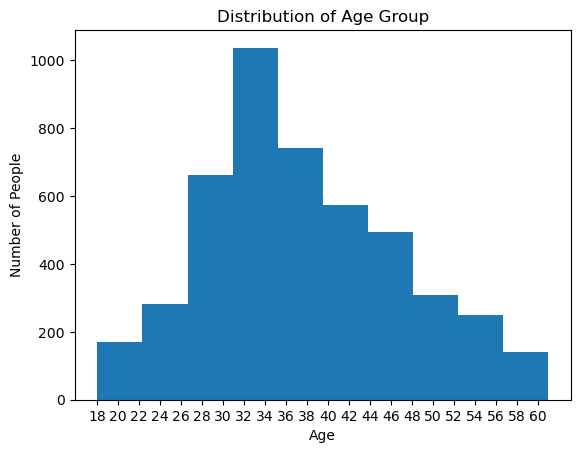

In [4]:
df["Age"].max()
df["Age"].min()
df["Age"].plot(kind="hist" ,xticks=range(18,62,2),xlabel="Age",ylabel="Number of People" ,title="Distribution of Age Group")
df.loc[df["Gender"]=="Fe Male","Gender"]="Female"

In [288]:
new_df=pd.crosstab(df["Age"],df["ProdTaken"])
new_df.head(3)

ProdTaken,0,1
Age,,
18.0,6,8
19.0,11,21
20.0,13,25


<Axes: title={'center': 'Customer Age vs Number of Product Sold'}, xlabel='Age', ylabel='Number of customers who bought the product'>

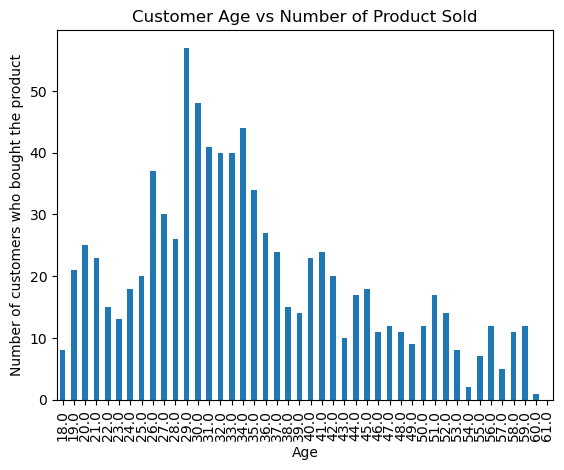

In [289]:
new_df[1].plot(kind="bar",x=range(1,50,2), xlabel="Age" , ylabel="Number of customers who bought the product",title="Customer Age vs Number of Product Sold")

### 

### B. How does the type of contact (type of contact) influence the likelihood of purchasing a travel product?

#### Ans: Self Inquired customers purchased the product the most.

In [294]:
likelihood=pd.crosstab(df["ProdTaken"],df["TypeofContact"])
likelihood.rename(index={0:"NO",1:"YES"},inplace=True)
print(likelihood)

TypeofContact  Company Invited  Self Enquiry
ProdTaken                                   
NO                        1109          2837
YES                        310           607


<Axes: title={'center': 'Impact of Contact type on Travel Product purchases'}, xlabel='Number of customers', ylabel='Product Taken'>

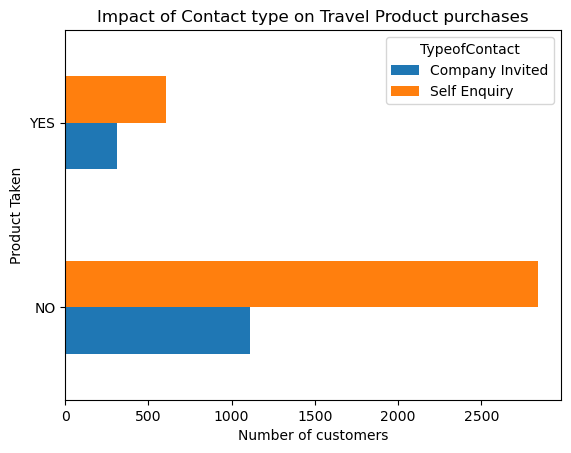

In [295]:
likelihood.plot(kind="barh",ylabel="Product Taken", xlabel="Number of customers" ,title="Impact of Contact type on Travel Product purchases")

### 

### C.  Is there a correlation between the city tier(citytier)and monthly income (monthly income) of customers?
#### Ans:- Yes there is a positive correlation between the city tier and monthly income , as the city tier increases monthly salary also increases. The Pearson correlation coefficient between city tier and monthly income is 0.9951.
### 

In [308]:
income_vs_tier=pd.DataFrame(df["MonthlyIncome"].groupby(df["CityTier"]).mean().round(2))
income_vs_tier.reset_index(inplace=True)
print(income_vs_tier,"\n")
income_vs_tier.corr(method="pearson").round(4)

   CityTier  MonthlyIncome
0         1       23418.10
1         2       23773.16
2         3       24023.80 



,CityTier,MonthlyIncome
CityTier,1.0000,0.9951
MonthlyIncome,0.9951,1.0000


###     

###  D.  What is the average duration of a pitch (duration of pitch)for customers who purchased a product versus those who did not? 

#### Ans:- The average duration of pitch for the customers who purchased the product is 16.87 and for the customers who don't purchase the product is 15.17


In [152]:


avg_duration=pd.DataFrame(df["DurationOfPitch"].groupby(df["ProdTaken"]).mean().round(2))
avg_duration

,DurationOfPitch
ProdTaken,
0,15.17
1,16.87


### 

### E. How do occupation types(occupation)distribute among customers,and is there an occupation type that is more likely to purchase a travel product? 
#### Ans:- Salaried people followed by Large Businesses  and Small Bussinesses are most likely to but the product.

<Axes: xlabel='Product Sold', ylabel='Number of Customers'>

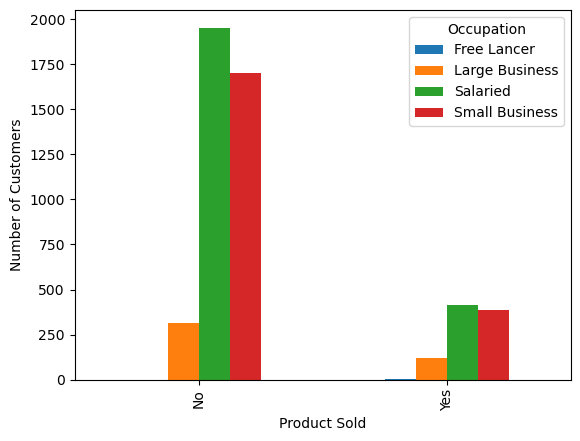

In [296]:
new=pd.crosstab(df["ProdTaken"],df["Occupation"]).rename(index={0:"No",1:"Yes"})
new.plot(kind="bar",ylabel="Number of Customers",xlabel="Product Sold")

###

### F. Are there any gender-based preferences for the type of product pitched (ProductPitched)? 
#### Ans:- Fe Male prefers Deluxe the most while male and females prefer basic the most. The least preferred by all the gender is King.

<Axes: title={'center': 'Gender-Based Preferences in Product Pitching'}, xlabel='Gender', ylabel='Number of Pitches'>

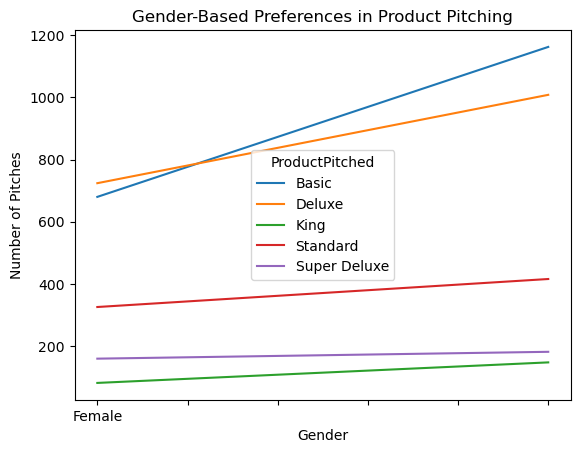

In [12]:
df["Gender"].groupby(df["ProductPitched"]).count()
new8=pd.crosstab(df["Gender"],df["ProductPitched"])
new8.plot(kind="line",ylabel="Number of Pitches", title="Gender-Based Preferences in Product Pitching")

###

### H. Does having a passport(passport)correlate with a higher number of trips taken or a higher likelihood of purchasing a travel product? 
#### Ans:- People who are having passport prefer to go for 1-5 days of trip the most.People who don't have the passport also prefer 1-5 days of trip the most. The number of trips of the people who don't have passport is comparatively higher , so , the likelihood of people purchasing the product who don't have passport is high.


In [285]:
trips=pd.crosstab(df["NumberOfTrips"],df["Passport"], values=df["NumberOfTrips"], aggfunc="sum").sum()
trips2=pd.DataFrame(trips,columns=["NumberOfTrips"])
trips2.index.name="Passport Availability"
trips2.rename(index={0:"No",1:"Yes"})
trips2

,NumberOfTrips
Passport Availability,
0,10836.0
1,4531.0


###

### I. How satisfied are customers with the pitch (pitch satisfaction score),and does this satisfaction influence product purchase? 

                        NumberOfFollowups
PitchSatisfactionScore                   
1                                  3460.0
2                                  2184.0
3                                  5390.0
4                                  3349.0
5                                  3577.0


The average satisfaction score is : 3.078150572831424




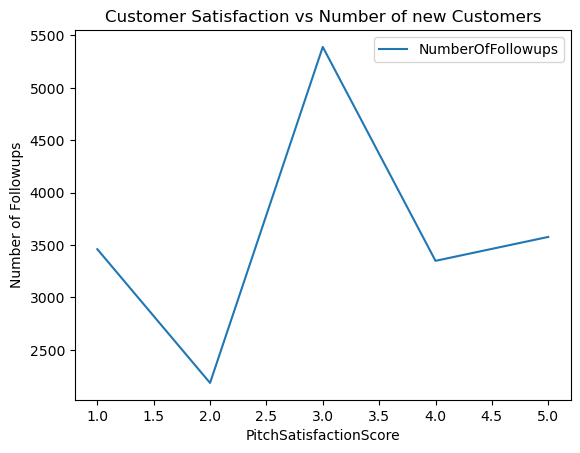

In [306]:


customer_comeback=pd.DataFrame(df["NumberOfFollowups"].groupby(df["PitchSatisfactionScore"]).sum())
customer_comeback.plot(kind="line",ylabel="Number of Followups",title="Customer Satisfaction vs Number of new Customers")
print(customer_comeback)
avg_satisfaction=df["PitchSatisfactionScore"].mean()
print(f"\n\nThe average satisfaction score is : {avg_satisfaction}\n\n")

### J. Among customers with children (number of children visiting), how does the number of children impact travel product purchases? 

ProdTaken                   No  Yes
NumberOfChildrenVisiting           
0.0                        880  202
1.0                       1688  392
2.0                       1082  253
3.0                        259   66


<Axes: title={'center': 'The Impact of Number of Children on Travel Product Purchases'}, xlabel='NumberOfChildrenVisiting', ylabel='Number of customers'>

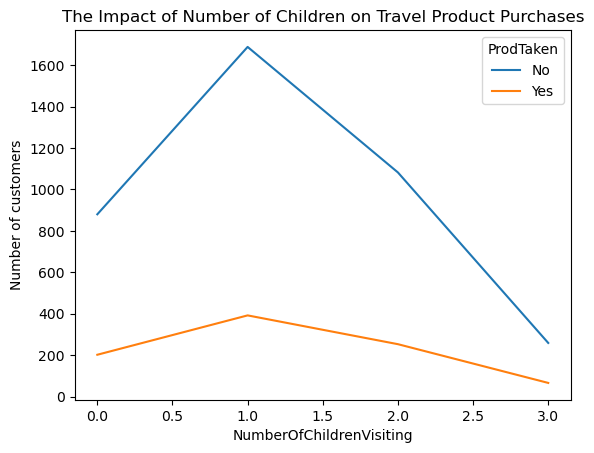

In [298]:
child_effect=pd.crosstab(df["NumberOfChildrenVisiting"],df["ProdTaken"])
child_effect.rename(columns={0:"No",1:"Yes"},inplace=True)
print(child_effect)
child_effect.plot(kind="line",ylabel="Number of customers",title="The Impact of Number of Children on Travel Product Purchases")

### 

### K. Gender preferences for product types: how does gender influence the preference for different types of travel products pitched (product pitched)? 

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe
Gender                                                     
Female            680     724    82       326           160
Male             1162    1008   148       416           182


<Axes: title={'center': 'Relationship between  Gender and Travel Preferences'}, xlabel='Gender', ylabel='Number of Customers'>

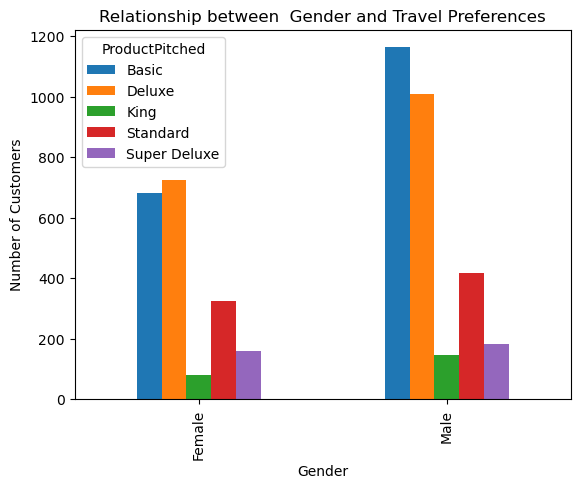

In [13]:
gender_effect=pd.crosstab(df["Gender"],df["ProductPitched"])
print(gender_effect)
gender_effect.plot(kind="bar",ylabel="Number of Customers",title="Relationship between  Gender and Travel Preferences")

###

### L. Impact of marital status on travel preferences: does marital status affect the choice of travel product, and if so, how do different marital statuses correlate with product purchases (prod taken)?

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe
MaritalStatus                                              
Divorced          332     336    52       142            88
Married           816     852   126       380           166
Single            511     221    52        50            82
Unmarried         183     323     0       170             6


<Axes: title={'center': 'Influence of Marital Status on Travel Preferences'}, xlabel='Number of Customers', ylabel='MaritalStatus'>

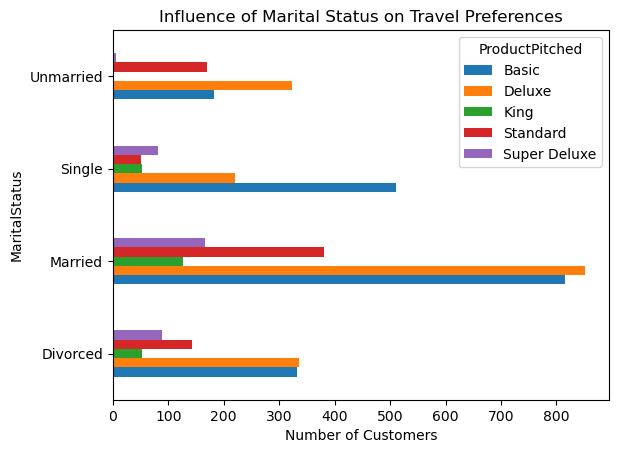

In [274]:
martial_status_effect=pd.crosstab(df["MaritalStatus"],df["ProductPitched"])
print(martial_status_effect)
martial_status_effect.plot(kind="barh",xlabel="Number of Customers",title="Influence of Marital Status on Travel Preferences")

### 

### M. Relationship between number of children and travel product interest: how does the number of children visiting (number of children visiting) impact the likelihood of purchasing a travel product?

In [201]:
pd.crosstab(df["NumberOfChildrenVisiting"],df["ProductPitched"])

ProductPitched,Basic,Deluxe,King,Standard,Super Deluxe
NumberOfChildrenVisiting,,,,,
0.0,404,391,31,172,84
1.0,793,754,89,318,126
2.0,517,474,72,198,74
3.0,127,112,17,53,16


###

### N. Influence of owning a car on travel decisions: is there a correlation between owning a car (own car) and the number of trips taken (number of trips) or the type of travel product purchased? 

In [225]:
ownCar=pd.DataFrame(pd.crosstab(df["NumberOfTrips"],df["OwnCar"] ,values=df["NumberOfTrips"] ,aggfunc="sum").sum())
ownCar.rename(columns={0:"Number of Trips"},inplace=True)
ownCar

,Number of Trips
OwnCar,
0,5915.0
1,9452.0


In [233]:
car_vs_product=pd.DataFrame(pd.crosstab(df["ProductPitched"],df["OwnCar"]))
car_vs_product.rename(columns={0:"No",1:"Yes"},inplace=True)
car_vs_product

OwnCar,No,Yes
ProductPitched,,
Basic,758,1084
Deluxe,674,1058
King,64,166
Standard,258,484
Super Deluxe,102,240


###

### 

### O. Income level and product choice: how does the monthly income (monthly income) of customers influence their choice of travel products, and is there a preferred product for different income levels? 

In [251]:
pd.crosstab(df["MonthlyIncome"],df["ProductPitched"],values=df["MonthlyIncome"], aggfunc="mean").mean()

ProductPitched
Basic           20213.965874
Deluxe          22694.568947
King            35792.614286
Standard        26604.261851
Super Deluxe    32118.866029
dtype: float64

In [273]:
avg_salary_vs_product=pd.DataFrame(pd.crosstab(df["MonthlyIncome"],df["ProductPitched"],values=df["MonthlyIncome"], aggfunc="mean").mean())
avg_salary_vs_product.rename(columns={0:"Average Monthly Income"},inplace=True)
avg_salary_vs_product

,Average Monthly Income
ProductPitched,
Basic,20213.965874
Deluxe,22694.568947
King,35792.614286
Standard,26604.261851
Super Deluxe,32118.866029


<Axes: title={'center': 'Relationship Between Monthly Income and Travel Product Preferences'}, xlabel='ProductPitched', ylabel='Average Monthly Income'>

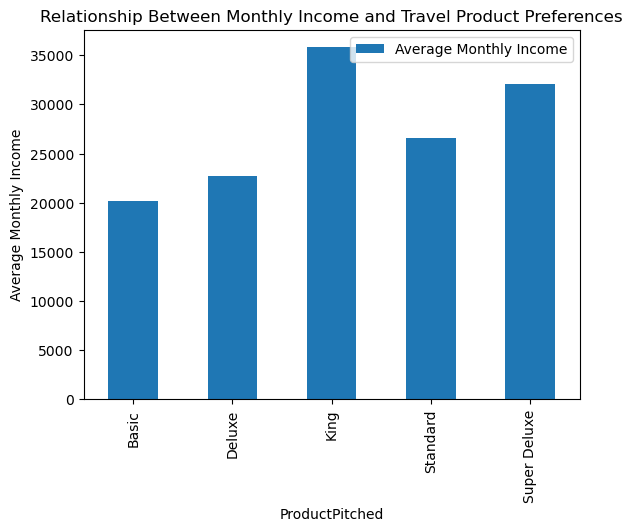

In [272]:
avg_salary_vs_product.plot(kind="bar",ylabel="Average Monthly Income",title="Relationship Between Monthly Income and Travel Product Preferences")